In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.feature_selection import f_regression, SelectKBest
import shap

In [2]:
df = pd.read_csv('Restaurant_revenue.csv')
df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_customers        1000 non-null   int64  
 1   menu_price                 1000 non-null   float64
 2   marketing_spend            1000 non-null   float64
 3   cuisine_type               1000 non-null   object 
 4   average_customer_spending  1000 non-null   float64
 5   promotions                 1000 non-null   int64  
 6   reviews                    1000 non-null   int64  
 7   monthly_revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
df.duplicated().sum()

0

Целевая переменная - `monthly_revenue`

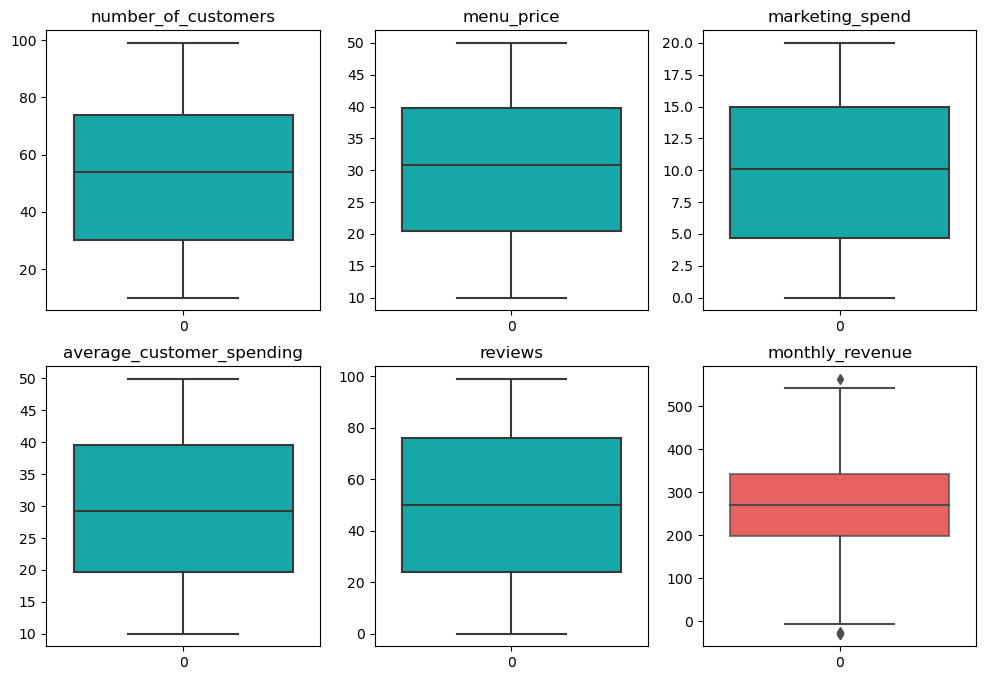

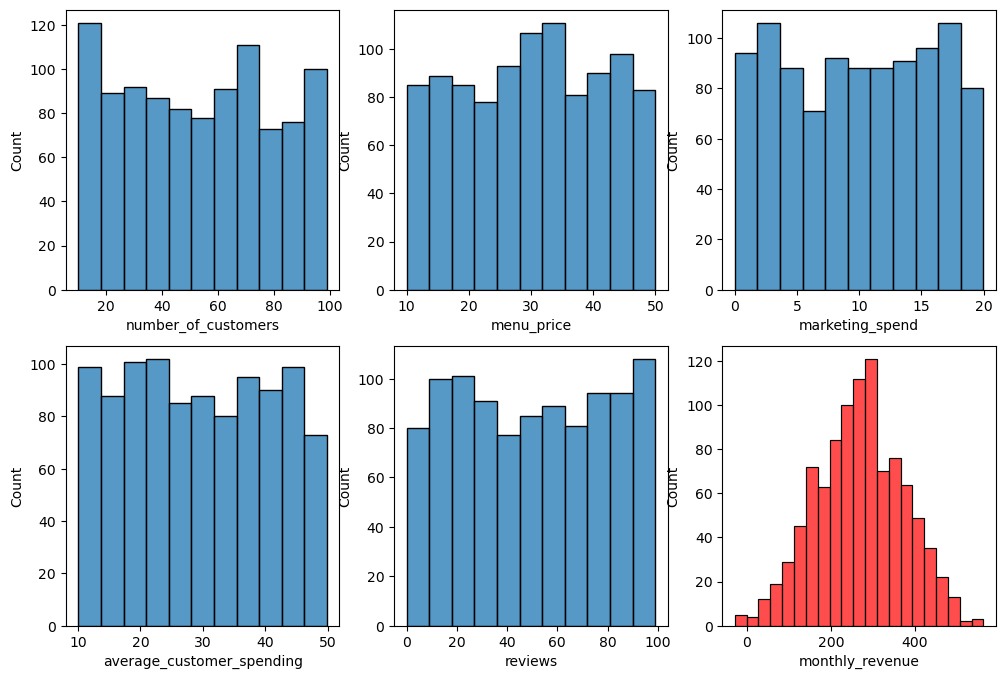

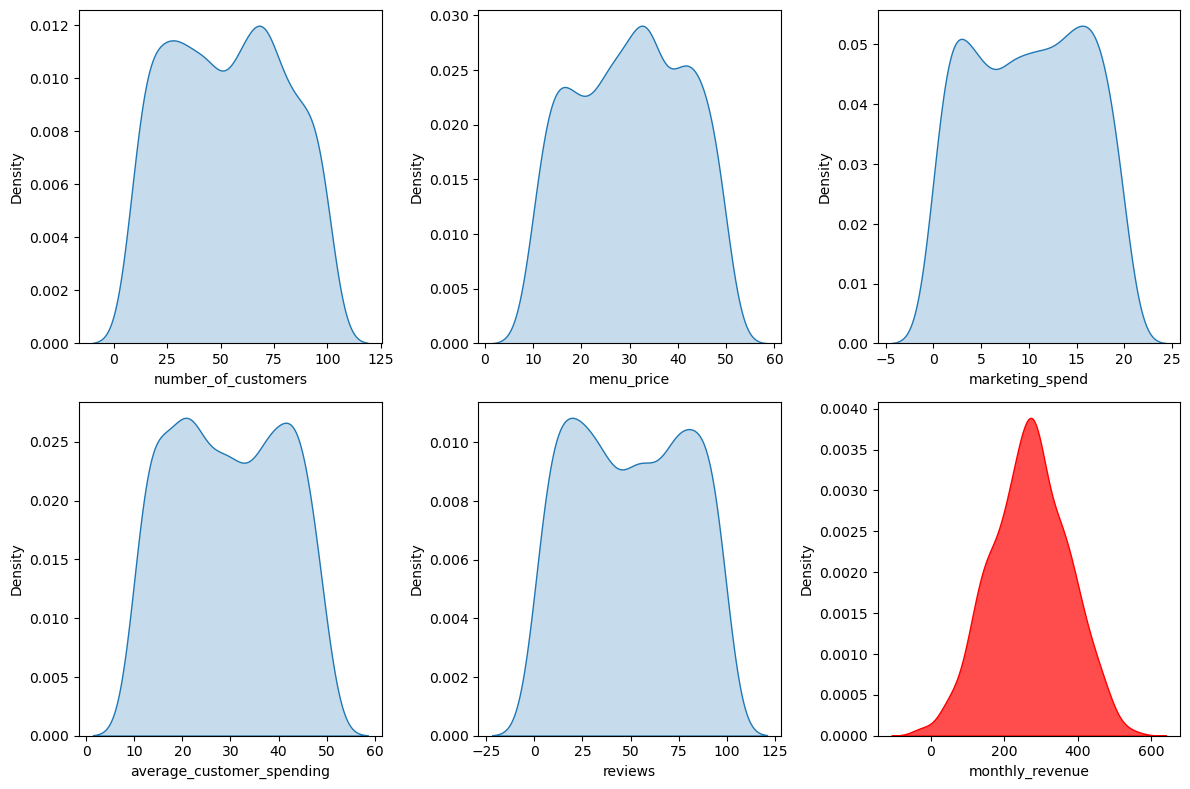

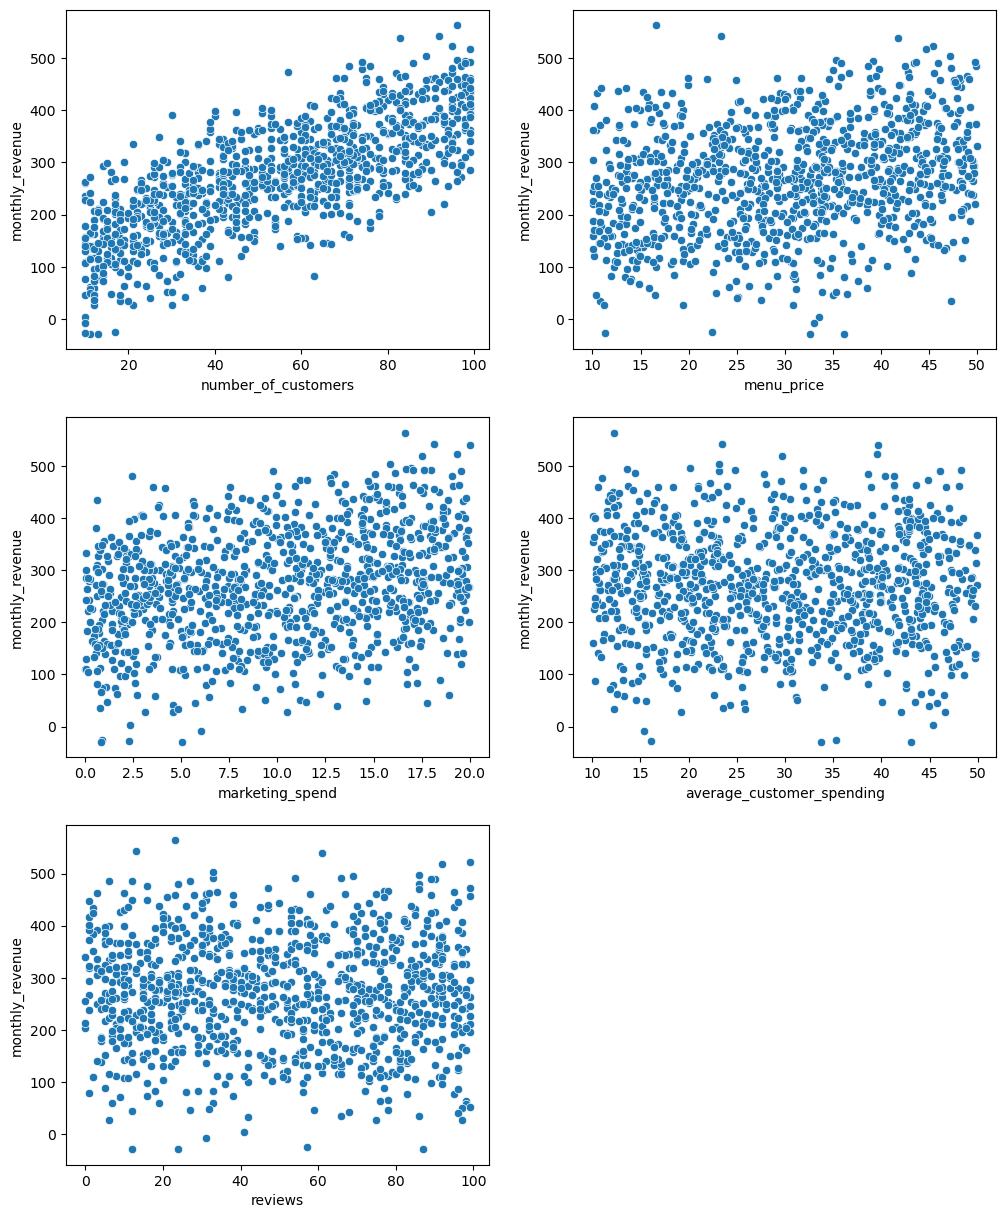

In [7]:
plt.subplots(figsize=(12, 8))
for i, element in enumerate(['number_of_customers', 'menu_price', 'marketing_spend', 'average_customer_spending', 'reviews']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[element], color='c').set(title=element)
plt.subplot(2, 3, 6)
sns.boxplot(df['monthly_revenue'], color='r', boxprops=dict(alpha=0.7)).set(title='monthly_revenue')
# boxprops=dict(alpha=0.7) - только так в sns.boxplot можно задать прозрачность
plt.show()
print('\n')

plt.subplots(figsize=(12, 8))
for i, element in enumerate(['number_of_customers', 'menu_price', 'marketing_spend', 'average_customer_spending', 'reviews']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[element])
plt.subplot(2, 3, 6)
sns.histplot(df['monthly_revenue'], color='r', alpha=0.7)
plt.show()
print('\n')

plt.subplots(figsize=(12, 8))
for i, element in enumerate(['number_of_customers', 'menu_price', 'marketing_spend', 'average_customer_spending', 'reviews']):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(df[element], fill=True)
plt.subplot(2, 3, 6)
sns.kdeplot(df['monthly_revenue'], color='r', alpha=0.7, fill=True)
plt.tight_layout()
plt.show()
print('\n')

plt.subplots(figsize=(12, 15))
for i, element in enumerate(['number_of_customers', 'menu_price', 'marketing_spend', 'average_customer_spending', 'reviews']):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(df, x=element, y='monthly_revenue')
plt.show()

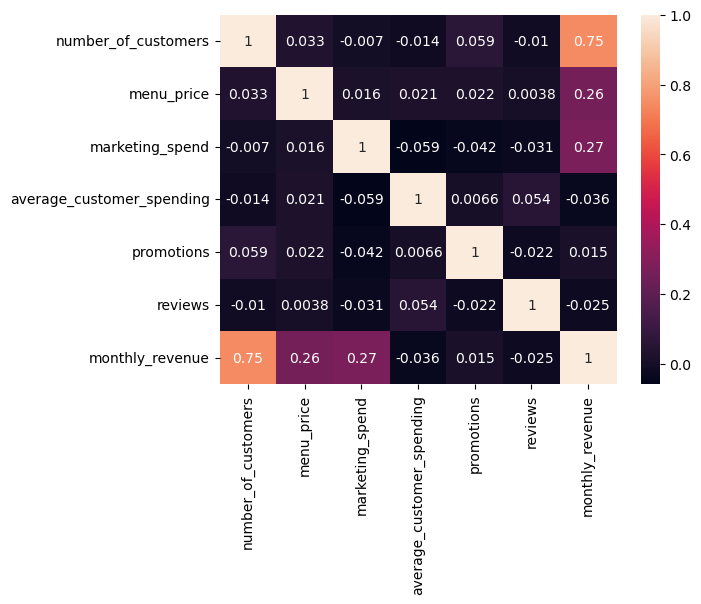

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
X = df.drop('monthly_revenue', axis=1)
y= df[['monthly_revenue']]

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# сюда будем сохранять показатели качества для моделей (R2, MSE, RMSE, MAE, MAPE)
train_res = pd.DataFrame(index=['R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
test_res = pd.DataFrame(index=['R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])

In [12]:
model = LinearRegression()
model.fit(train_X.drop('cuisine_type', axis=1), train_y)
R2_train = model.score(train_X.drop('cuisine_type', axis=1), train_y)
R2_test = model.score(test_X.drop('cuisine_type', axis=1), test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.6805824596197815
R2 на test: 0.6908090402691222


In [13]:
mse_train = mean_squared_error(train_y, model.predict(train_X.drop('cuisine_type', axis=1)))
mse_test = mean_squared_error(test_y, model.predict(test_X.drop('cuisine_type', axis=1)))

rmse_train = mean_squared_error(train_y, model.predict(train_X.drop('cuisine_type', axis=1)), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(test_X.drop('cuisine_type', axis=1)), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(train_X.drop('cuisine_type', axis=1)))
mae_test = mean_absolute_error(test_y, model.predict(test_X.drop('cuisine_type', axis=1)))

mape_train = mean_absolute_percentage_error(train_y, model.predict(train_X.drop('cuisine_type', axis=1)))
mape_test = mean_absolute_percentage_error(test_y, model.predict(test_X.drop('cuisine_type', axis=1)))

In [14]:
print("Среднеквадратическая ошибка (MSE) на train:", mse_train)
print("Среднеквадратическая ошибка (RMSE) на train:", rmse_train)
print("Средняя абсолютная ошибка (MAE) на train:", mae_train)
print("Средняя абсолютная ошибка  (MAPE) на train:", mape_train)
print()
print("Среднеквадратическая ошибка (MSE) на test:", mse_test)
print("Среднеквадратическая ошибка (RMSE) на test:", rmse_test)
print("Средняя абсолютная ошибка (MAE) на test:", mae_test)
print("Средняя абсолютная ошибка  (MAPE) на test:", mape_test)

Среднеквадратическая ошибка (MSE) на train: 3314.615953224062
Среднеквадратическая ошибка (RMSE) на train: 57.57270145845219
Средняя абсолютная ошибка (MAE) на train: 46.468436887353434
Средняя абсолютная ошибка  (MAPE) на train: 0.3314853028141054

Среднеквадратическая ошибка (MSE) на test: 3604.2088829265977
Среднеквадратическая ошибка (RMSE) на test: 60.03506377881677
Средняя абсолютная ошибка (MAE) на test: 46.80513633109309
Средняя абсолютная ошибка  (MAPE) на test: 0.25709567677134154


In [15]:
train_res['изначальная_модель'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['изначальная_модель'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [16]:
train_res

,изначальная_модель
R2,0.68
MSE,3314.62
RMSE,57.57
MAE,46.47
MAPE,0.33


In [17]:
test_res

,изначальная_модель
R2,0.69
MSE,3604.21
RMSE,60.04
MAE,46.81
MAPE,0.26


## Категоризация

In [18]:
df['cuisine_type'].value_counts()

Japanese    262
American    256
Mexican     250
Italian     232
Name: cuisine_type, dtype: int64

In [19]:
# Закодируем категориальные признаки
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first', handle_unknown='ignore')
enc.fit(train_X[['cuisine_type']])

feature_name = enc.get_feature_names_out(['cuisine_type'])
train_X[feature_name] = enc.transform(train_X[['cuisine_type']]).toarray()
train_X = train_X.drop(['cuisine_type'], axis=1)

test_X[feature_name] = enc.transform(test_X[['cuisine_type']]).toarray()
test_X = test_X.drop(['cuisine_type'], axis=1)

In [20]:
model = LinearRegression()
model.fit(train_X, train_y)
R2_train = model.score(train_X, train_y)
R2_test = model.score(test_X, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.6807792719325688
R2 на test: 0.6913288113196514


In [21]:
mse_train = mean_squared_error(train_y, model.predict(train_X))
mse_test = mean_squared_error(test_y, model.predict(test_X))

rmse_train = mean_squared_error(train_y, model.predict(train_X), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(test_X), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(train_X))
mae_test = mean_absolute_error(test_y, model.predict(test_X))

mape_train = mean_absolute_percentage_error(train_y, model.predict(train_X))
mape_test = mean_absolute_percentage_error(test_y, model.predict(test_X))

In [22]:
train_res['после_кодировки'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['после_кодировки'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [23]:
train_res

,изначальная_модель,после_кодировки
R2,0.68,0.68
MSE,3314.62,3312.57
RMSE,57.57,57.55
MAE,46.47,46.45
MAPE,0.33,0.33


In [24]:
test_res

,изначальная_модель,после_кодировки
R2,0.69,0.69
MSE,3604.21,3598.15
RMSE,60.04,59.98
MAE,46.81,46.78
MAPE,0.26,0.26


## Создание полиномиальных признаков

In [25]:
poly = PolynomialFeatures(4)
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out())
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [26]:
train_X

,1,number_of_customers,menu_price,marketing_spend,average_customer_spending,promotions,reviews,cuisine_type_Italian,cuisine_type_Japanese,cuisine_type_Mexican,...,cuisine_type_Italian^2 cuisine_type_Mexican^2,cuisine_type_Italian cuisine_type_Japanese^3,cuisine_type_Italian cuisine_type_Japanese^2 cuisine_type_Mexican,cuisine_type_Italian cuisine_type_Japanese cuisine_type_Mexican^2,cuisine_type_Italian cuisine_type_Mexican^3,cuisine_type_Japanese^4,cuisine_type_Japanese^3 cuisine_type_Mexican,cuisine_type_Japanese^2 cuisine_type_Mexican^2,cuisine_type_Japanese cuisine_type_Mexican^3,cuisine_type_Mexican^4
0,1.0,27.0,33.204489,8.882554,17.477257,1.0,53.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,47.0,26.179418,14.400161,23.572913,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,14.0,24.971871,10.148927,11.879700,1.0,9.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,72.0,33.908943,14.819625,44.742281,1.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,61.0,43.117635,12.663793,36.236133,0.0,45.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,1.0,97.0,19.929058,18.405944,12.178642,0.0,16.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,1.0,57.0,48.483951,0.268053,39.563657,0.0,27.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
667,1.0,11.0,37.033650,12.741817,47.505591,0.0,96.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
668,1.0,57.0,42.797877,11.544995,33.974920,1.0,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
model = LinearRegression()
model.fit(train_X, train_y)
R2_train = model.score(train_X, train_y)
R2_test = model.score(test_X, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.8723661823348072
R2 на test: 0.06201937403773883


In [28]:
mse_train = mean_squared_error(train_y, model.predict(train_X))
mse_test = mean_squared_error(test_y, model.predict(test_X))

rmse_train = mean_squared_error(train_y, model.predict(train_X), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(test_X), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(train_X))
mae_test = mean_absolute_error(test_y, model.predict(test_X))

mape_train = mean_absolute_percentage_error(train_y, model.predict(train_X))
mape_test = mean_absolute_percentage_error(test_y, model.predict(test_X))

In [29]:
train_res['с_полиномиальными_признаками'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['с_полиномиальными_признаками'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [30]:
train_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками
R2,0.68,0.68,0.87
MSE,3314.62,3312.57,1324.46
RMSE,57.57,57.55,36.39
MAE,46.47,46.45,26.78
MAPE,0.33,0.33,0.15


In [31]:
test_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками
R2,0.69,0.69,0.06
MSE,3604.21,3598.15,10933.95
RMSE,60.04,59.98,104.57
MAE,46.81,46.78,80.74
MAPE,0.26,0.26,0.41


## Отбор признаков по F-критерию

In [32]:
selector = SelectKBest(f_regression, k=16)
train_X_f_reg = pd.DataFrame(selector.fit_transform(train_X, np.array(train_y).ravel()), columns=selector.get_feature_names_out())
test_X_f_reg = pd.DataFrame(selector.transform(test_X), columns=selector.get_feature_names_out())

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [33]:
model = LinearRegression()
model.fit(train_X_f_reg, train_y)
R2_train = model.score(train_X_f_reg, train_y)
R2_test = model.score(test_X_f_reg, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.683811166463585
R2 на test: 0.6849331846165643


In [34]:
mse_train = mean_squared_error(train_y, model.predict(train_X_f_reg))
mse_test = mean_squared_error(test_y, model.predict(test_X_f_reg))

rmse_train = mean_squared_error(train_y, model.predict(train_X_f_reg), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(test_X_f_reg), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(train_X_f_reg))
mae_test = mean_absolute_error(test_y, model.predict(test_X_f_reg))

mape_train = mean_absolute_percentage_error(train_y, model.predict(train_X_f_reg))
mape_test = mean_absolute_percentage_error(test_y, model.predict(test_X_f_reg))

In [35]:
train_res['после_отбора_признаков по_F-критерию'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['после_отбора_признаков по_F-критерию'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [36]:
train_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию
R2,0.68,0.68,0.87,0.68
MSE,3314.62,3312.57,1324.46,3281.11
RMSE,57.57,57.55,36.39,57.28
MAE,46.47,46.45,26.78,45.83
MAPE,0.33,0.33,0.15,0.33


In [37]:
test_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию
R2,0.69,0.69,0.06,0.68
MSE,3604.21,3598.15,10933.95,3672.70
RMSE,60.04,59.98,104.57,60.60
MAE,46.81,46.78,80.74,47.46
MAPE,0.26,0.26,0.41,0.26


## Отбор признаков по значению Шепли

In [38]:
model = LinearRegression()
model.fit(train_X, train_y)
explainer = shap.Explainer(model, train_X)
shap_values = explainer(test_X)

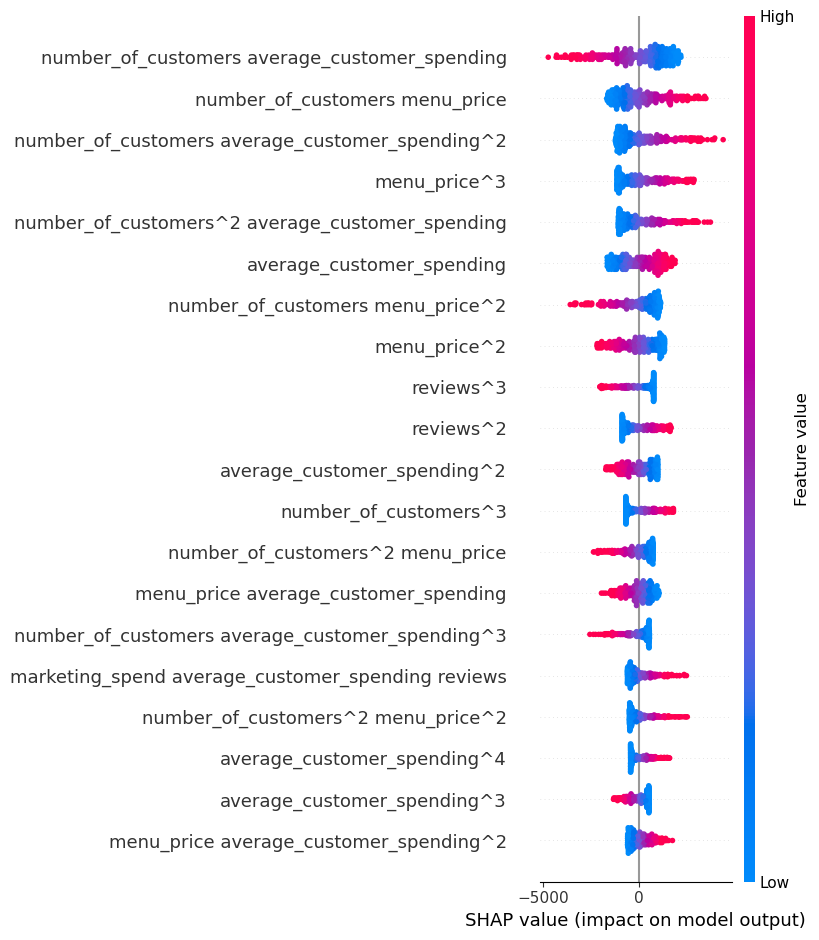

<Figure size 640x480 with 0 Axes>

In [39]:
shap.summary_plot(shap_values, test_X)
plt.tight_layout()

## Отбор признаков по пермутационной важности

In [40]:
import eli5
from eli5.sklearn import PermutationImportance

In [41]:
reg = LinearRegression().fit(train_X, train_y)

In [42]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [43]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
449.4260 ± 36.4579,number_of_customers average_customer_spending
284.9361 ± 52.6252,number_of_customers average_customer_spending^2
274.0186 ± 21.2599,number_of_customers menu_price
214.3599 ± 8.8407,number_of_customers^2 average_customer_spending
211.3183 ± 14.8519,number_of_customers menu_price^2
205.5605 ± 25.4321,menu_price^3
174.4111 ± 9.4484,menu_price^2
168.2354 ± 22.0948,average_customer_spending
122.0569 ± 15.8347,reviews^3
107.4270 ± 14.1792,reviews^2


### Пермутационная важность вручную

In [44]:
# создаём модель регрессии на основе набора train
reg = LinearRegression().fit(train_X, train_y)

In [45]:
# находим R2 тестовых наборов по модели, созданной на основе набора train
r2 = reg.score(test_X, test_y)

In [46]:
data = pd.DataFrame(data = test_X.columns, columns=['factors'])

In [47]:
weight = []
for column in test_X.columns:
    test_X_temporary = test_X.copy()
    # перемешиваем значения столбца column в случайном порядке .sample(frac=1)
    # (frac=1 означает, что доля выборки (sample) среди всех значений в столбце column равна 1, т.е. все значения перемешиваем)
    test_X_temporary[column] = test_X_temporary[column].sample(frac=1).tolist()
    # находим R2 тестовых наборов (где теперь тестовые значения факторов в столбце column перемешаны) по модели,
    # созданной на основе набора train
    r2_new = reg.score(test_X_temporary, test_y)
    # находим разницу между r2 и r2_new
    weig = round(r2 - r2_new, 4)
    
    weight.append(weig)

In [48]:
data['weight'] = weight

In [49]:
# сортируем датафрейм по убыванию качества прогноза
data = data.sort_values(by='weight', ascending=False)
data

,factors,weight
13,number_of_customers average_customer_spending,428.0474
79,number_of_customers average_customer_spending^2,262.0308
11,number_of_customers menu_price,260.2908
58,number_of_customers^2 average_customer_spending,219.8039
100,menu_price^3,207.7347
...,...,...
543,marketing_spend average_customer_spending prom...,-0.0018
366,number_of_customers reviews^2 cuisine_type_Ita...,-0.0020
177,average_customer_spending reviews cuisine_type...,-0.0022
153,marketing_spend promotions cuisine_type_Mexican,-0.0025


In [50]:
train_X_perm = train_X[data['factors'].tolist()[:88]]
test_X_perm = test_X[data['factors'].tolist()[:88]]

In [51]:
model = LinearRegression()
model.fit(train_X_perm, train_y)
R2_train = model.score(train_X_perm, train_y)
R2_test = model.score(test_X_perm, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.7169018843830735
R2 на test: 0.6512653985169774


In [52]:
mse_train = mean_squared_error(train_y, model.predict(train_X_perm))
mse_test = mean_squared_error(test_y, model.predict(test_X_perm))

rmse_train = mean_squared_error(train_y, model.predict(train_X_perm), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(test_X_perm), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(train_X_perm))
mae_test = mean_absolute_error(test_y, model.predict(test_X_perm))

mape_train = mean_absolute_percentage_error(train_y, model.predict(train_X_perm))
mape_test = mean_absolute_percentage_error(test_y, model.predict(test_X_perm))

In [53]:
train_res['после_отбора_признаков по_пермутационной важности'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['после_отбора_признаков по_пермутационной важности'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [54]:
train_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности
R2,0.68,0.68,0.87,0.68,0.72
MSE,3314.62,3312.57,1324.46,3281.11,2937.73
RMSE,57.57,57.55,36.39,57.28,54.20
MAE,46.47,46.45,26.78,45.83,42.51
MAPE,0.33,0.33,0.15,0.33,0.30


In [55]:
test_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности
R2,0.69,0.69,0.06,0.68,0.65
MSE,3604.21,3598.15,10933.95,3672.70,4065.17
RMSE,60.04,59.98,104.57,60.60,63.76
MAE,46.81,46.78,80.74,47.46,51.41
MAPE,0.26,0.26,0.41,0.26,0.27


## Метод главных компонент (PCA)

In [56]:
scaler= StandardScaler()

scaler.fit(train_X)

train_X_stand = pd.DataFrame(scaler.transform(train_X), columns=scaler.get_feature_names_out())
test_X_stand = pd.DataFrame(scaler.transform(test_X), columns=scaler.get_feature_names_out())

In [57]:
cov = np.cov(train_X_stand, rowvar=False)

In [58]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [59]:
eigenvalues, eigenvectors = np.real(eigenvalues), np.real(eigenvectors) # оставляем только вещественные числа

In [60]:
eigenvalues[:70]

array([97.99553624, 90.29660917, 81.15937151, 45.33215035, 29.95811508,
       25.00916372, 23.29031818, 21.60509838, 17.91216622, 13.91855914,
       12.89170437,  8.42758604,  7.7106866 ,  7.30047812,  6.57343143,
        6.05228927,  5.27920755,  4.61423021,  4.21390934,  3.96973176,
        3.88864315,  3.57519312,  3.17875413,  2.38032269,  2.31679623,
        2.32932862,  2.16276007,  1.88987582,  1.72193989,  1.7335735 ,
        1.58150812,  1.44641048,  1.4187693 ,  1.31101115,  1.24076264,
        1.15817835,  1.10056474,  1.05875304,  1.00755941,  0.98620929,
        0.94625646,  0.8455577 ,  0.82141131,  0.78463256,  0.74706924,
        0.69345686,  0.63395348,  0.58322466,  0.49587381,  0.47029693,
        0.46454104,  0.4402319 ,  0.42171927,  0.40271433,  0.38097252,
        0.36153867,  0.34681931,  0.336349  ,  0.32118545,  0.28759084,
        0.28421932,  0.27451875,  0.25885429,  0.25260783,  0.24482812,
        0.23729187,  0.2313511 ,  0.22698004,  0.21085419,  0.20

In [61]:
U = eigenvectors[:,:69]

In [62]:
train_X_pca = np.dot(train_X_stand, U)

In [63]:
test_X_pca = np.dot(test_X_stand, U)

In [64]:
model = LinearRegression()
model.fit(train_X_pca, train_y)
R2_train = model.score(train_X_pca, train_y)
R2_test = model.score(test_X_pca, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.7040876908924953
R2 на test: 0.6524871402501098


In [65]:
mse_train = mean_squared_error(train_y, model.predict(train_X_pca))
mse_test = mean_squared_error(test_y, model.predict(test_X_pca))

rmse_train = mean_squared_error(train_y, model.predict(train_X_pca), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(test_X_pca), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(train_X_pca))
mae_test = mean_absolute_error(test_y, model.predict(test_X_pca))

mape_train = mean_absolute_percentage_error(train_y, model.predict(train_X_pca))
mape_test = mean_absolute_percentage_error(test_y, model.predict(test_X_pca))

In [66]:
train_res['PCA'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['PCA'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [67]:
train_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности,PCA
R2,0.68,0.68,0.87,0.68,0.72,0.70
MSE,3314.62,3312.57,1324.46,3281.11,2937.73,3070.70
RMSE,57.57,57.55,36.39,57.28,54.20,55.41
MAE,46.47,46.45,26.78,45.83,42.51,44.41
MAPE,0.33,0.33,0.15,0.33,0.30,0.32


In [68]:
test_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности,PCA
R2,0.69,0.69,0.06,0.68,0.65,0.65
MSE,3604.21,3598.15,10933.95,3672.70,4065.17,4050.92
RMSE,60.04,59.98,104.57,60.60,63.76,63.65
MAE,46.81,46.78,80.74,47.46,51.41,50.98
MAPE,0.26,0.26,0.41,0.26,0.27,0.28


## Дополнительно

In [69]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(train_X)

#### Регуляризация Ridge

In [70]:
# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(x_train_st, train_y)

Ridge()

In [71]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(test_X)

In [73]:
mse_train = mean_squared_error(train_y, model.predict(x_train_st))
mse_test = mean_squared_error(test_y, model.predict(x_test_st))

rmse_train = mean_squared_error(train_y, model.predict(x_train_st), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(x_test_st), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(x_train_st))
mae_test = mean_absolute_error(test_y, model.predict(x_test_st))

mape_train = mean_absolute_percentage_error(train_y, model.predict(x_train_st))
mape_test = mean_absolute_percentage_error(test_y, model.predict(x_test_st))

In [74]:
train_res['Ridge'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['Ridge'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [75]:
train_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности,PCA,Ridge
R2,0.68,0.68,0.87,0.68,0.72,0.70,0.70
MSE,3314.62,3312.57,1324.46,3281.11,2937.73,3070.70,1971.27
RMSE,57.57,57.55,36.39,57.28,54.20,55.41,44.40
MAE,46.47,46.45,26.78,45.83,42.51,44.41,34.29
MAPE,0.33,0.33,0.15,0.33,0.30,0.32,0.22


In [76]:
test_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности,PCA,Ridge
R2,0.69,0.69,0.06,0.68,0.65,0.65,0.65
MSE,3604.21,3598.15,10933.95,3672.70,4065.17,4050.92,4843.55
RMSE,60.04,59.98,104.57,60.60,63.76,63.65,69.60
MAE,46.81,46.78,80.74,47.46,51.41,50.98,56.48
MAPE,0.26,0.26,0.41,0.26,0.27,0.28,0.30


#### Регуляризация Lasso

In [77]:
# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(x_train_st, train_y)

Lasso()

In [78]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(test_X)

In [80]:
mse_train = mean_squared_error(train_y, model.predict(x_train_st))
mse_test = mean_squared_error(test_y, model.predict(x_test_st))

rmse_train = mean_squared_error(train_y, model.predict(x_train_st), squared=False)
rmse_test = mean_squared_error(test_y, model.predict(x_test_st), squared=False)

mae_train = mean_absolute_error(train_y, model.predict(x_train_st))
mae_test = mean_absolute_error(test_y, model.predict(x_test_st))

mape_train = mean_absolute_percentage_error(train_y, model.predict(x_train_st))
mape_test = mean_absolute_percentage_error(test_y, model.predict(x_test_st))

In [81]:
train_res['Lasso'] = np.array([R2_train, mse_train, rmse_train, mae_train, mape_train]).round(2)
test_res['Lasso'] = np.array([R2_test, mse_test, rmse_test, mae_test, mape_test]).round(2)

In [82]:
train_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности,PCA,Ridge,Lasso
R2,0.68,0.68,0.87,0.68,0.72,0.70,0.70,0.70
MSE,3314.62,3312.57,1324.46,3281.11,2937.73,3070.70,1971.27,3115.86
RMSE,57.57,57.55,36.39,57.28,54.20,55.41,44.40,55.82
MAE,46.47,46.45,26.78,45.83,42.51,44.41,34.29,44.73
MAPE,0.33,0.33,0.15,0.33,0.30,0.32,0.22,0.33


In [83]:
test_res

,изначальная_модель,после_кодировки,с_полиномиальными_признаками,после_отбора_признаков по_F-критерию,после_отбора_признаков по_пермутационной важности,PCA,Ridge,Lasso
R2,0.69,0.69,0.06,0.68,0.65,0.65,0.65,0.65
MSE,3604.21,3598.15,10933.95,3672.70,4065.17,4050.92,4843.55,3746.86
RMSE,60.04,59.98,104.57,60.60,63.76,63.65,69.60,61.21
MAE,46.81,46.78,80.74,47.46,51.41,50.98,56.48,48.24
MAPE,0.26,0.26,0.41,0.26,0.27,0.28,0.30,0.27


In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn import tree
dr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')
dr.fit(train_X, train_y)
clf = tree.DecisionTreeRegressor().fit(train_X, train_y)
reg = linear_model.LassoLars(alpha=0.1).fit(train_X, train_y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [85]:
R2_train = dr.score(train_X, train_y)
R2_test = dr.score(test_X, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.731458237709385
R2 на test: 0.6761271011454906


In [88]:
R2_train = clf.score(train_X, train_y)
R2_test = clf.score(test_X, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 1.0
R2 на test: 0.336938080681879


In [89]:
R2_train = reg.score(train_X, train_y)
R2_test = reg.score(test_X, test_y)
print(f"R2 на train: {R2_train}")
print(f"R2 на test: {R2_test}")

R2 на train: 0.6800953645700745
R2 на test: 0.6835153280262228
